# Project 9: Coupled Systems
## Abstract
In this project, we were investigating eigenvalues and eigenvectors in a coupled mass system. The physical context was the oscillation of three equal masses coupled by four springs of equal spring constants. We used the python "eig" function to compute the eigenvalues and eigenvectors for this system. Three eigenvalues were found for this system because this sytem involves three coupled masses. The eigenvalues depends on our values for k and m, which are 10 $Nm^{-1}$ and 1kg respectively. The eigenvalues of this system were computed to be:$-\omega^2$ = [-34.142, -20.0, -5.858] We also found out that one of the normal mode frequencies was the square root of one of the eigenvalues.
## Description
An eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue is the factor by which the eigenvector is scaled. They are a special set of scalars associated with a linear system of equations (i.e., a matrix equation) that are sometimes also known as characteristic roots, characteristic values, proper values, or latent roots.

Let A be a linear transformation represented by a matrix A. If there is a vector $x\epsilon$ $R^n \neq0$ such that
$Ax = \lambda x$ 	
for some scalar lambda, then lambda is called the eigenvalue of A with corresponding (right) eigenvector x.

Letting A be a k X k square matrix

$$\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{k1} & a_{k2} & \cdots & a_{kk} \end{bmatrix} $$ 
with eigenvalue $\lambda$, then the corresponding eigenvectors satisfy
$$\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{k1} & a_{k2} & \cdots & a_{kk} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_k\end{bmatrix} = \lambda \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_k\end{bmatrix} $$ 

which is equivalent to the homogeneous system
$$\begin{bmatrix} a_{11}- \lambda  & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} - \lambda & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{k1} & a_{k2} & \cdots & a_{kk}- \lambda \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_k\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0\end{bmatrix} $$

Equation above can be written compactly as

 $ (A-\lambda I)x=0 $  
where I is the identity matrix. As shown in Cramer's rule, a linear system of equations has nontrivial solutions if the determinant vanishes, so the solutions of equation above are given by

$\det(A-\lambda I)=0$

This equation is known as the characteristic equation of A, and the left-hand side is known as the characteristic polynomial.

## Algorithm and Discussion
Consider a system as shown in the figure below

![Coupledmasses.png](Coupledmasses.png)

Using Hooke's Law we can find the force acting on each mass. We compare this to Newton's definition of force. We put all these in matrix forms and we then find out that the eigenvalue is $-\omega^2$.
We using eig function to find the eigenvalues and use the RK4 approach to validate that the eigenvalues computed are correct.

$$k_1 = k_2 = k_3 = k_4 = k$$
$$m_1 = m_2 = m_3 = m$$
$$F_1 = -k\,x_1 +k\,(x_2-x_1)$$	
$$F_2 =-k\,(x_2-x_1)+k\,(x_3-x_2)$$	
$$F_3 =-k\,(x_3-x_2)+k\,(-x_3)$$




$$\hat{a}\left|t\right\rangle = -\omega^2\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}e^{-i\omega t}$$


$$\hat{F}\left|x\right\rangle = \begin{bmatrix} -2k & k & 0 \\ k & -2k & k \\ 0 & k & -2k \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}e^{-i\omega t}$$


$$-m\omega^2\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}e^{-i\omega t} = \begin{bmatrix} -2k & k & 0 \\ k & -2k & k \\ 0 & k & -2k \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}e^{-i\omega t}$$


$$\begin{bmatrix} \frac{2k}{m} & \frac{-k}{m} & 0 \\ \frac{-k}{m} & \frac{2k}{m} & \frac{-k}{m} \\ 0 & \frac{-k}{m} & \frac{2k}{m} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix} = \omega^2\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}$$


$$\begin{bmatrix} \frac{2k}{m} - \omega^2 & \frac{-k}{m} & 0 \\ \frac{-k}{m} & \frac{2k}{m} - \omega^2 & \frac{-k}{m} \\ 0 & \frac{-k}{m} & \frac{2k}{m} - \omega^2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}  = 0$$ 


$$\begin{vmatrix} \frac{2k}{m} - \omega^2 & \frac{-k}{m} & 0 \\ \frac{-k}{m} & \frac{2k}{m} - \omega^2 & \frac{-k}{m} \\ 0 & \frac{-k}{m} & \frac{2k}{m} - \omega^2 \end{vmatrix} = 0 $$


## Implementation and Code
We use the eig function to find eigenvalues and eigenvectors then we use to Rk4 to validate the values we computed. We also investigate the motion of each masses with subplots.

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
import sympy as sp
from numpy import linalg as LA

k = 10
m = 1.0
Mat = np.array([[-(2*k)/m, k/m, 0],[k/m, -(2*k)/m, k/m],[0, k/m, -(2*k)/m]])

vals, vecs = LA.eig(Mat)

print("values:")
print(np.around(vals,3))
print("vector:")
print(np.around(vecs, 3))

values:
[-34.142 -20.     -5.858]
vector:
[[ 0.5    0.707  0.5  ]
 [-0.707  0.     0.707]
 [ 0.5   -0.707  0.5  ]]


Using the Rk4 to validate the eigenvalues. We start out our masses at the eigenvectors. We state our initial conditions to be the eigenvectors

In [8]:
L = 10
k = 10
m = 1.0
dt = 0.03
t = 0.0

x1i =0.5*L/10  # initial displacement from equil, m1
v1i = 0.0   # initial vel, m1
x2i = 0.71*L/10  # initial displacement from equil, m2
v2i = 0.0   # initial vel, m2
x3i = 0.5*L/10  # initial displacement from equil, m3
v3i = 0.0   # initial vel, m3

s = np.array([x1i, v1i, x2i, v2i, x3i, v3i]) # initial state

def derivs_3m(s, t):
    x1=s[0]   # get the variables from the state
    v1=s[1]
    x2=s[2]
    v2=s[3]
    x3=s[4]
    v3=s[5]
    a1 = (-(2*k*x1) + k*x2)/m
    a2 = (-(2*k)*x2 + k*x1 + k*x3)/m
    a3 = (k*x2 - (2*k)*x3)/m
    return np.array([v1, a1, v2, a2, v3, a3])
    
def RK4Step(s, dt, t, derivs):
    """
    Take a single RK4 step.
    """
    f1 = derivs(s, t)
    f2 = derivs(s+f1*dt/2.0, t+dt/2.0)
    f3 = derivs(s+f2*dt/2.0, t+dt/2.0)
    f4 = derivs(s+f3*dt, t+dt)
    return s + (f1+2*f2+2*f3+f4)*dt/6.0

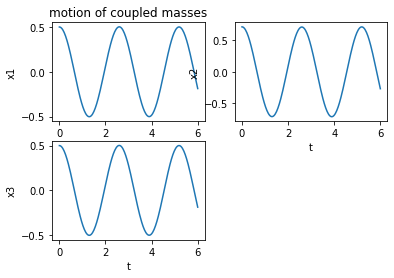

In [9]:
x1list=[s[0]]
x2list=[s[2]]
x3list=[s[4]]
tlist=[0.0]
t=0.0

while t<6:
    s = RK4Step(s, dt, t, derivs_3m)
    t += dt
    x1list.append(s[0])
    x2list.append(s[2])
    x3list.append(s[4])
    tlist.append(t)

pl.subplot(221)
pl.ylabel("x1")
pl.title("motion of coupled masses")
pl.plot(tlist,x1list,label="x1")
pl.subplot(222)
pl.ylabel("x2")
pl.xlabel("t")
pl.plot(tlist,x2list,label="x2")
pl.subplot(223)
pl.ylabel("x3")
pl.xlabel("t")
pl.plot(tlist,x3list,label="x3")

We use curvefitting function to find one out of the three of the normal mode frequencies. I curvefitted for all three masses just to confirm that they did oscillate with the same frequency

A => 0.5009755240452879
omega**2 => 5.857865857639822
phi => -0.00011479642670829052


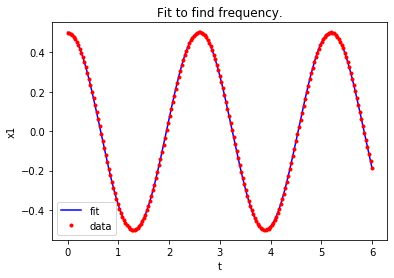

In [10]:
from scipy.optimize import curve_fit

def cosFit(t, A, omega, phi):
    """
    Function def for a cosine fit
    """
    return A*np.cos(omega*t+phi)

x1a=np.array(x1list)
ta=np.array(tlist)
popt, pcov = curve_fit(cosFit, ta, x1a, p0=(0.5, np.sqrt(5.858), 0.0))

A=popt[0]
omega=popt[1]
phi=popt[2]

print("A =>", A)
print("omega**2 =>", omega**2)
print("phi =>", phi)

pl.title('Fit to find frequency.')
pl.xlabel('t')
pl.ylabel('x1')
pl.plot(ta, cosFit(ta, A, omega, phi), 'b-', label="fit")
pl.plot(ta, x1a, 'r.', label='data')
pl.legend()

A => 0.7086202744686608
omega**2 => 5.857857194994849
phi => 0.00011501275702344706


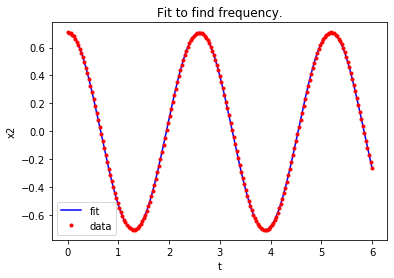

In [11]:
from scipy.optimize import curve_fit

def cosFit(t, A, omega, phi):
    """
    Function def for a cosine fit
    """
    return A*np.cos(omega*t+phi)

x2a=np.array(x2list)
ta=np.array(tlist)
popt, pcov = curve_fit(cosFit, ta, x2a, p0=(0.7071, np.sqrt(5.858), 0.0))

A=popt[0]
omega=popt[1]
phi=popt[2]

print("A =>", A)
print("omega**2 =>", omega**2)
print("phi =>", phi)

pl.title('Fit to find frequency.')
pl.xlabel('t')
pl.ylabel('x2')
pl.plot(ta, cosFit(ta, A, omega, phi), 'b-', label="fit")
pl.plot(ta, x2a, 'r.', label='data')
pl.legend()

A => 0.5009755228112173
omega**2 => 5.857865971069845
phi => -0.00011489283840897058


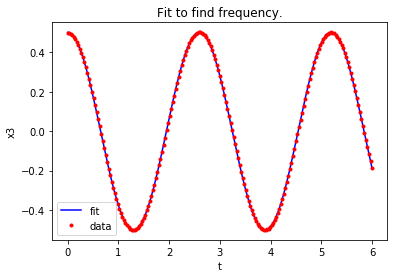

In [12]:
from scipy.optimize import curve_fit

def cosFit(t, A, omega, phi):
    """
    Function def for a cosine fit
    """
    return A*np.cos(omega*t+phi)

x3a=np.array(x3list)
ta=np.array(tlist)
popt, pcov = curve_fit(cosFit, ta, x3a, p0=(0.7071, np.sqrt(5.858), 0.0))

A=popt[0]
omega=popt[1]
phi=popt[2]

print("A =>", A)
print("omega**2 =>", omega**2)
print("phi =>", phi)

pl.title('Fit to find frequency.')
pl.xlabel('t')
pl.ylabel('x3')
pl.plot(ta, cosFit(ta, A, omega, phi), 'b-', label="fit")
pl.plot(ta, x3a, 'r.', label='data')
pl.legend()

After this fit, we found out that one of the normal mode frequency was the squareroot of one of the eigenvalues.

## Conclusion
In this project, we were investigating eigenvectors and eigenvalues of a coupled system of three masses connected with four springs of equal spring constants. The eigenvalues of this system were computed to be:$-\omega^2$ = [-34.142, -20.0, -5.858] We used Rk4 approach to validate one of the eigenvalues and we found out that one of the normal mode frequency of the system was the squareroot of one of the eigenvalues.